In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("Employee_data.csv")

df['Attrition'] = df['Attrition'].str.strip().str.title()

df.drop_duplicates(inplace=True)

df.fillna(df.mean(numeric_only=True), inplace=True)

print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB
None
EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64


In [ ]:
# Statistics
print("Mean:\n", df.mean(numeric_only=True))
print("Median:\n", df.median(numeric_only=True))
print("Mode:\n", df.mode(numeric_only=True).iloc[0])
print("Variance:\n", df.var(numeric_only=True))
print("Standard Deviation:\n", df.std(numeric_only=True))


Mean:
 EmployeeID             50.50
Age                    36.57
Salary              72820.00
YearsAtCompany         10.80
PerformanceScore       84.94
dtype: float64
Median:
 EmployeeID             50.5
Age                    35.0
Salary              72000.0
YearsAtCompany         10.0
PerformanceScore       85.5
dtype: float64
Mode:
 EmployeeID              1.0
Age                    29.0
Salary              68000.0
YearsAtCompany          2.0
PerformanceScore       80.0
Name: 0, dtype: float64
Variance:
 EmployeeID          8.416667e+02
Age                 6.919707e+01
Salary              1.598663e+08
YearsAtCompany      4.046465e+01
PerformanceScore    4.031960e+01
dtype: float64
Standard Deviation:
 EmployeeID             29.011492
Age                     8.318478
Salary              12643.823102
YearsAtCompany          6.361183
PerformanceScore        6.349771
dtype: float64


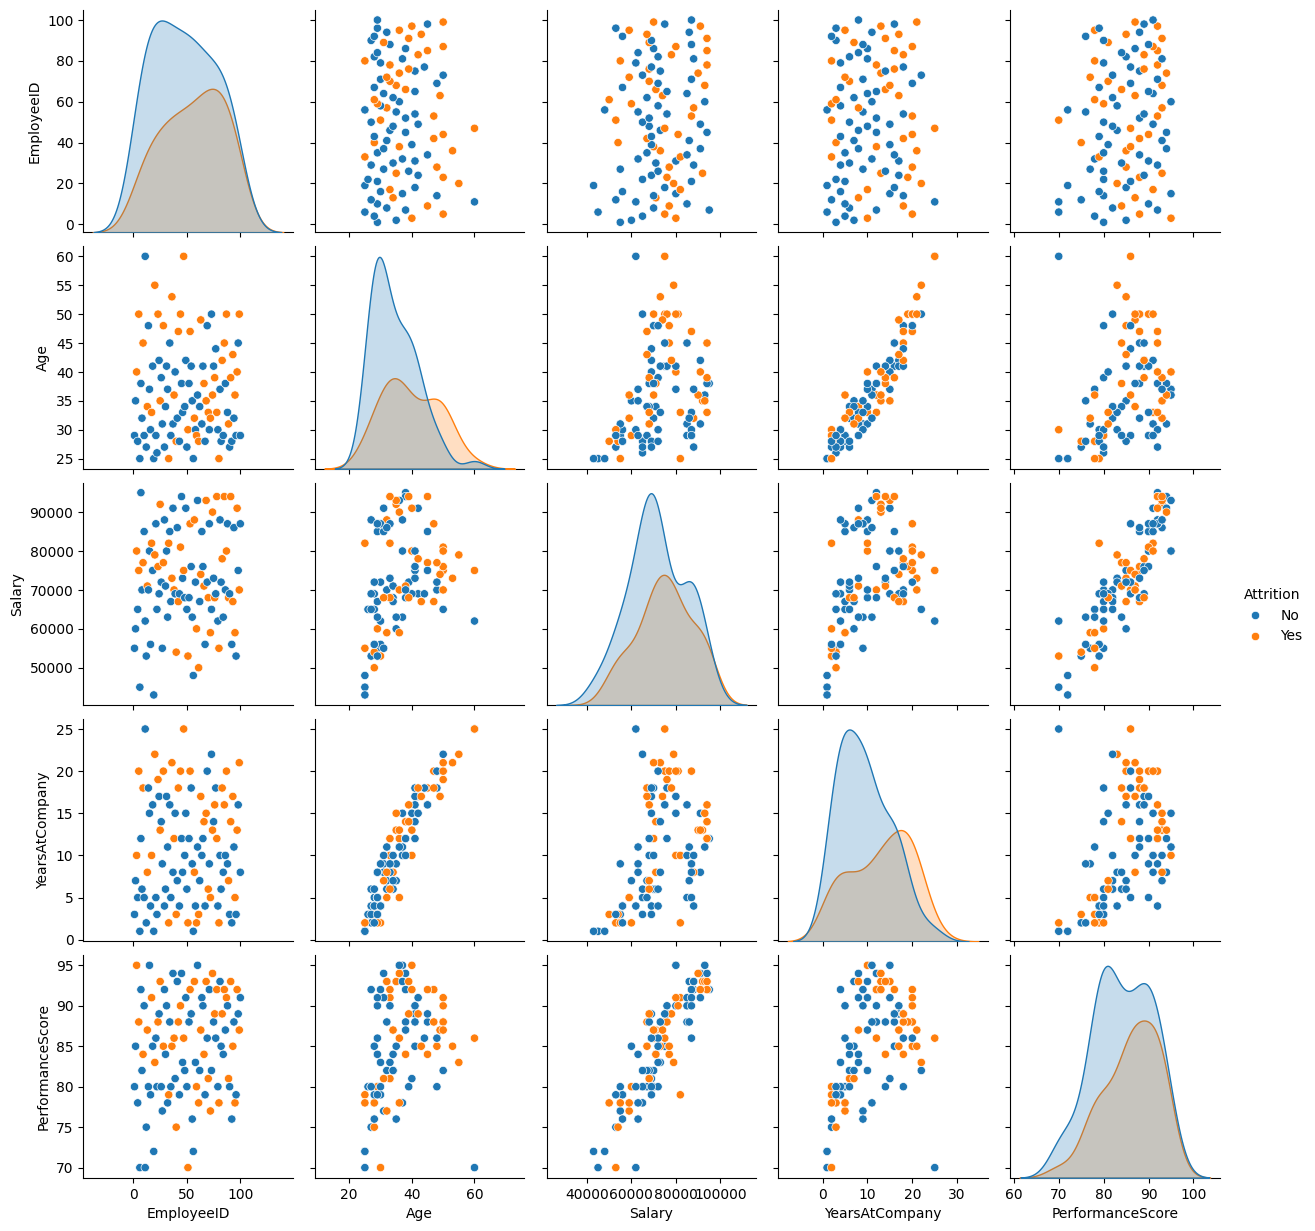

In [4]:
# Pairplot and Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="Attrition")
plt.show()


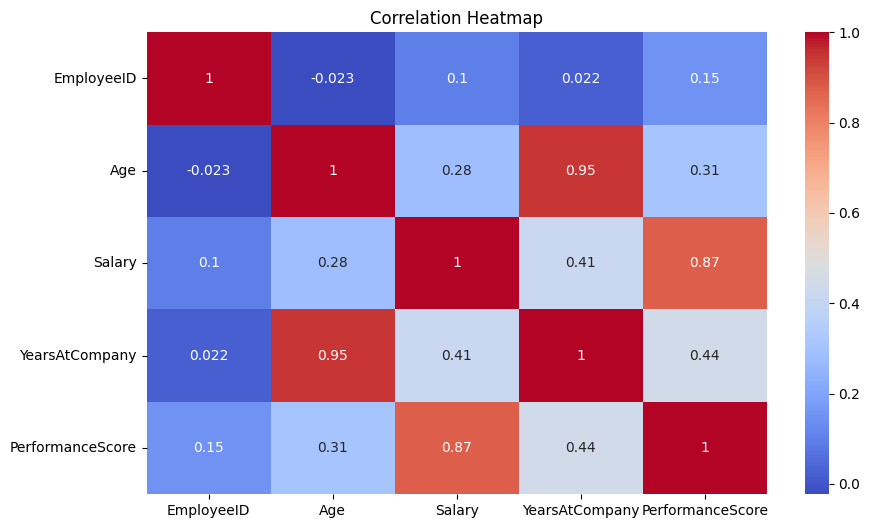

In [5]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


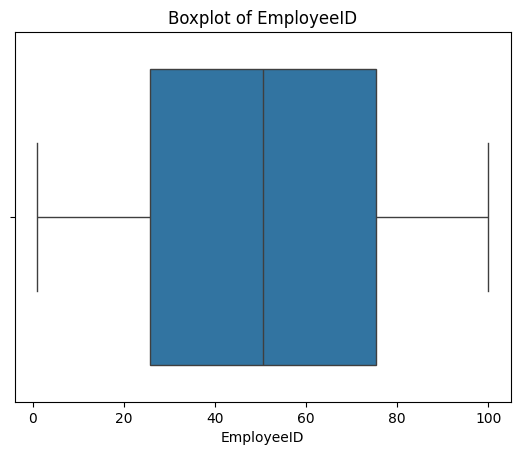

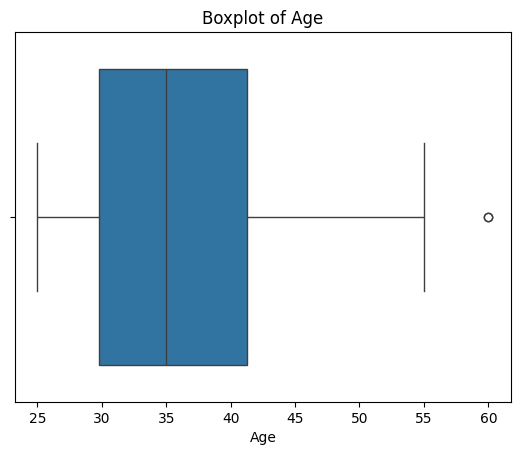

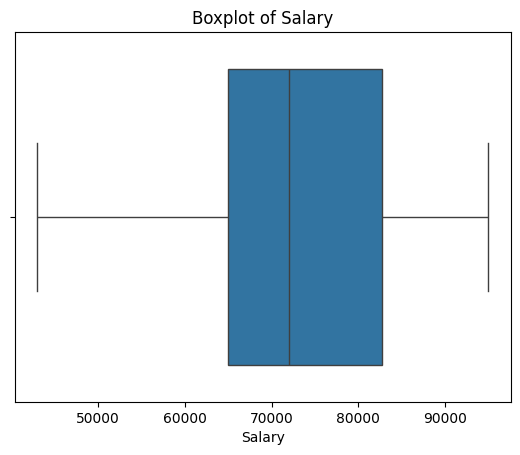

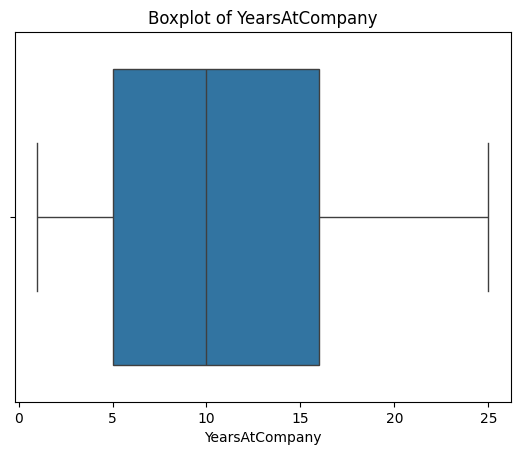

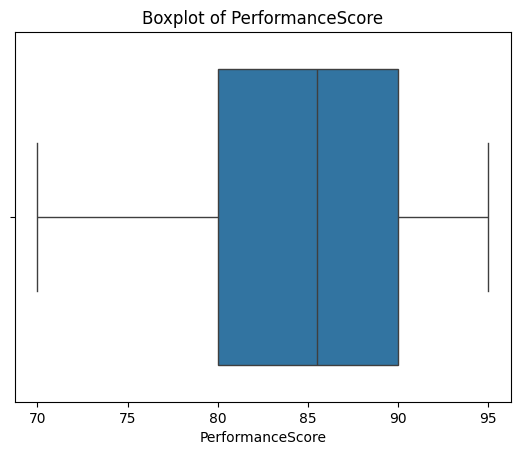

In [6]:
# Boxplots to detect outliers
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [7]:
# Probability of Attrition by Department and Performance Score group
df['PerformanceGroup'] = pd.cut(df['PerformanceScore'], bins=[0,70,85,100], labels=["Low","Medium","High"])
prob_table = df.groupby(['Department', 'PerformanceGroup'])['Attrition'].value_counts(normalize=True).unstack().fillna(0)
print(prob_table)


Attrition                           No       Yes
Department  PerformanceGroup                    
Engineering Low               0.000000  0.000000
            Medium            0.000000  1.000000
            High              0.592593  0.407407
HR          Low               1.000000  0.000000
            Medium            0.647059  0.352941
            High              0.571429  0.428571
Marketing   Low               0.000000  0.000000
            Medium            0.928571  0.071429
            High              0.500000  0.500000
Sales       Low               0.000000  1.000000
            Medium            0.533333  0.466667
            High              0.400000  0.600000


C:\Users\KRITISH DHIMAN\AppData\Local\Temp\ipykernel_16344\3312273986.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob_table = df.groupby(['Department', 'PerformanceGroup'])['Attrition'].value_counts(normalize=True).unstack().fillna(0)


In [ ]:
# Bayes' Theorem 
p_performance_high = (df['PerformanceGroup'] == 'High').mean()
p_attrition = (df['Attrition'] == 'Yes').mean()
p_high_given_attrition = df[(df['Attrition'] == 'Yes') & (df['PerformanceGroup'] == 'High')].shape[0] / df[df['Attrition'] == 'Yes'].shape[0]
bayes_result = (p_high_given_attrition * p_attrition) / p_performance_high
print("P(Attrition | Performance = High):", bayes_result)


P(Attrition | Performance = High): 0.46


In [9]:
# Hypothesis Testing: Mean Performance Score differs by Department
from scipy.stats import f_oneway

departments = df['Department'].unique()
samples = [df[df['Department'] == dept]['PerformanceScore'] for dept in departments]
f_stat, p_val = f_oneway(*samples)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject Null Hypothesis: Performance scores differ across departments.")
else:
    print("Fail to Reject Null: No significant difference in performance scores.")


ANOVA F-statistic: 25.781068086646336
p-value: 2.5591493445552065e-12
Reject Null Hypothesis: Performance scores differ across departments.


In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

df_model = df.copy()

scaler = MinMaxScaler()
df_model[['Salary', 'PerformanceScore']] = scaler.fit_transform(df_model[['Salary', 'PerformanceScore']])

label_encoders = {}
for col in ['Attrition', 'Department']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le
df_model = df_model.drop(['EmployeeID', 'Name', 'PerformanceGroup'], axis=1, errors='ignore')


              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.67      0.57      0.62         7

    accuracy                           0.75        20
   macro avg       0.73      0.71      0.72        20
weighted avg       0.74      0.75      0.75        20



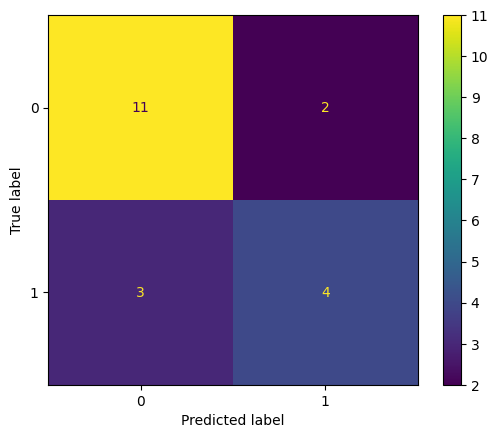

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_perf = df_model.drop('PerformanceScore', axis=1)
y_perf = df_model['PerformanceScore']

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_perf, y_perf, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train_p, y_train_p)

y_pred_p = lr.predict(X_test_p)

print("R² Score:", r2_score(y_test_p, y_pred_p))
print("Mean Squared Error:", mean_squared_error(y_test_p, y_pred_p))


R² Score: 0.7487625823959088
Mean Squared Error: 0.020525092068583838


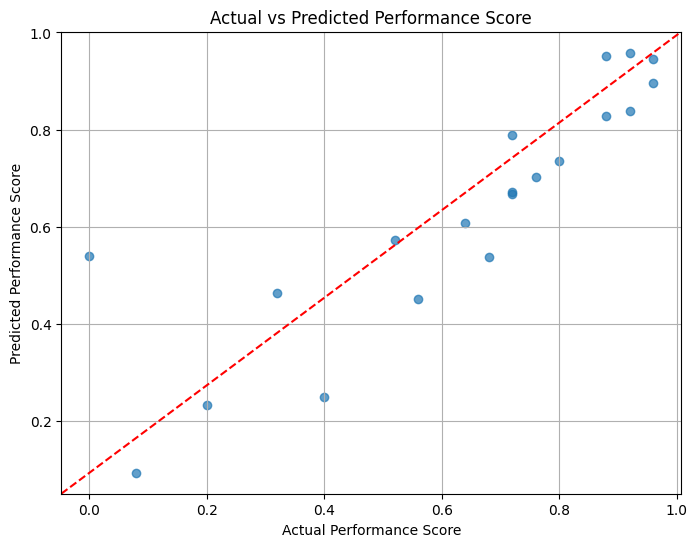

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test_p, y_pred_p, alpha=0.7)
plt.plot([0, 1], [0, 1], 'r--', transform=plt.gca().transAxes)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted Performance Score")
plt.grid(True)
plt.show()


In [14]:
import tensorflow as tf
print("TF Version:", tf.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

print("Keras model and layers imported successfully!")


TF Version: 2.19.0
Keras model and layers imported successfully!


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_reg = df_model.drop('PerformanceScore', axis=1)
y_reg = df_model['PerformanceScore']

scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

model_reg = Sequential([
    Dense(32, input_shape=(X_train_reg.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model_reg.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_reg = model_reg.fit(X_train_reg, y_train_reg, epochs=100, batch_size=8, validation_split=0.2, verbose=0)

loss, mae = model_reg.evaluate(X_test_reg, y_test_reg)
print("Test Mean Absolute Error:", mae)


c:\Users\KRITISH DHIMAN\.conda\envs\medibot\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 0.0281 - mae: 0.1260
Test Mean Absolute Error: 0.1260029375553131


In [ ]:
X_cls = df_model.drop('Attrition', axis=1)
y_cls = df_model['Attrition']

X_cls_scaled = scaler.fit_transform(X_cls)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls_scaled, y_cls, test_size=0.2, random_state=42)

model_cls = Sequential([
    Dense(32, input_shape=(X_train_cls.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_cls.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_cls = model_cls.fit(X_train_cls, y_train_cls, epochs=100, batch_size=8, validation_split=0.2, verbose=0)

y_pred_cls = (model_cls.predict(X_test_cls) > 0.5).astype("int32")

from sklearn.metrics import classification_report
print(classification_report(y_test_cls, y_pred_cls))


c:\Users\KRITISH DHIMAN\.conda\envs\medibot\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
              precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.44      0.57      0.50         7

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.63      0.60      0.61        20



In [ ]:
corr = df.corr(numeric_only=True)['PerformanceScore'].sort_values(ascending=False)

print("Correlation with Performance Score")
print("----------------------------------")
for feature, value in corr.items():
    print(f"{feature}: {value:.2f}")

top1 = corr.index[1]
top2 = corr.index[2]
print("\nKey Insight:")
print(f"- PerformanceScore is most positively correlated with {top1} ({corr[1]:.2f}) "
      f"and {top2} ({corr[2]:.2f}).")


Correlation with Performance Score
----------------------------------
PerformanceScore: 1.00
Salary: 0.87
YearsAtCompany: 0.44
Age: 0.31
EmployeeID: 0.15

Key Insight:
- PerformanceScore is most positively correlated with Salary (0.87) and YearsAtCompany (0.44).


C:\Users\KRITISH DHIMAN\AppData\Local\Temp\ipykernel_16344\2515707972.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"- PerformanceScore is most positively correlated with {top1} ({corr[1]:.2f}) "
C:\Users\KRITISH DHIMAN\AppData\Local\Temp\ipykernel_16344\2515707972.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"and {top2} ({corr[2]:.2f}).")


In [ ]:
performance_by_dept = df.groupby('Department')['PerformanceScore'].mean().sort_values(ascending=False)

print("\nAverage Performance Score by Department")
print("----------------------------------------")
for dept, score in performance_by_dept.items():
    print(f"{dept}: {score:.2f}")

top_dept = performance_by_dept.idxmax()
bottom_dept = performance_by_dept.idxmin()

print("\nKey Insight:")
print(f"- The '{top_dept}' department has the highest average performance score ({performance_by_dept.max():.2f}).")
print(f"- The '{bottom_dept}' department has the lowest average performance score ({performance_by_dept.min():.2f}).")



Average Performance Score by Department
----------------------------------------
Engineering: 91.64
Marketing: 83.20
Sales: 82.50
HR: 81.50

Key Insight:
- The 'Engineering' department has the highest average performance score (91.64).
- The 'HR' department has the lowest average performance score (81.50).


In [ ]:
attrition_rate = df.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').mean()).sort_values(ascending=False)

print("\nAttrition Rate by Department")
print("-----------------------------")
for dept, rate in attrition_rate.items():
    print(f"{dept}: {rate * 100:.1f}%")

high_attr_dept = attrition_rate.idxmax()
low_attr_dept = attrition_rate.idxmin()

print("\nKey Insight:")
print(f"- The '{high_attr_dept}' department has the highest attrition rate ({attrition_rate.max() * 100:.1f}%).")
print(f"- The '{low_attr_dept}' department has the lowest attrition rate ({attrition_rate.min() * 100:.1f}%).")



Attrition Rate by Department
-----------------------------
Sales: 53.8%
Engineering: 42.9%
HR: 34.6%
Marketing: 20.0%

Key Insight:
- The 'Sales' department has the highest attrition rate (53.8%).
- The 'Marketing' department has the lowest attrition rate (20.0%).


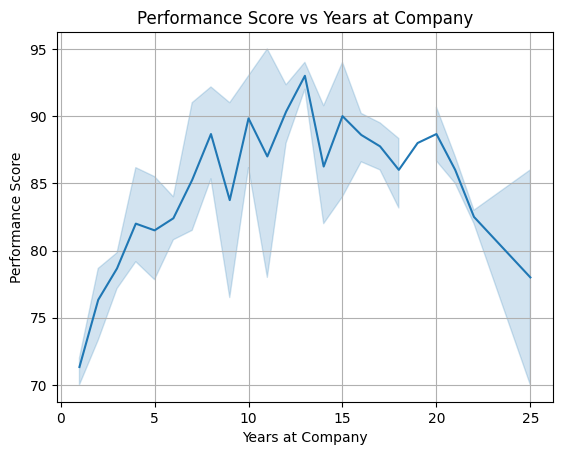

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df, x='YearsAtCompany', y='PerformanceScore')
plt.title("Performance Score vs Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Performance Score")
plt.grid(True)
plt.show()


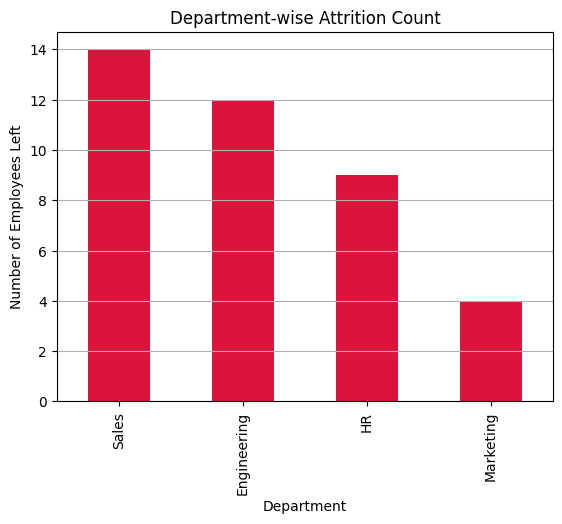

In [22]:
attr_counts = df[df['Attrition'] == 'Yes'].groupby('Department').size().sort_values(ascending=False)

attr_counts.plot(kind='bar', color='crimson')
plt.title("Department-wise Attrition Count")
plt.xlabel("Department")
plt.ylabel("Number of Employees Left")
plt.grid(axis='y')
plt.show()


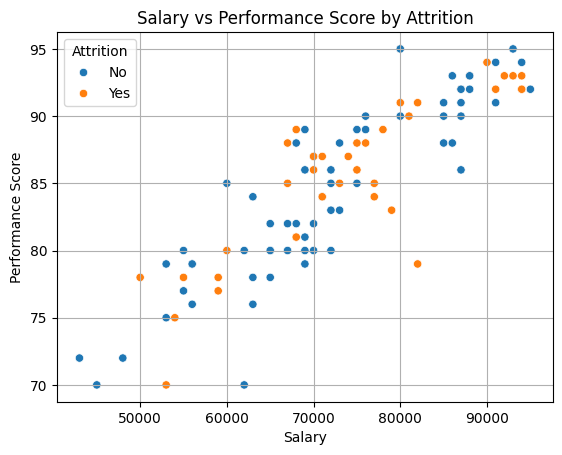

In [23]:
sns.scatterplot(data=df, x='Salary', y='PerformanceScore', hue='Attrition')
plt.title("Salary vs Performance Score by Attrition")
plt.xlabel("Salary")
plt.ylabel("Performance Score")
plt.grid(True)
plt.show()
